In [4]:
import cPickle as pickle
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import caffe
%matplotlib inline

caffe.set_mode_gpu()

#
#    Exploration of convolutional layers of AlexNet
#

deploy_file = 'rcnn_model/deploy.prototxt'
weight_file = 'rcnn_model/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(deploy_file, weight_file, caffe.TEST)

In [26]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0, filename = None):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    if( len(data.shape) < 4):
        plt.cmap('gray')
    plt.axis('off')
    plt.imshow(data)
    if filename is not None:
        fig = plt.gcf()
        fig.set_size_inches((16, 16))
        plt.savefig(filename, dpi = 600)
        plt.close()

(96, 3, 11, 11)


KeyboardInterrupt: 

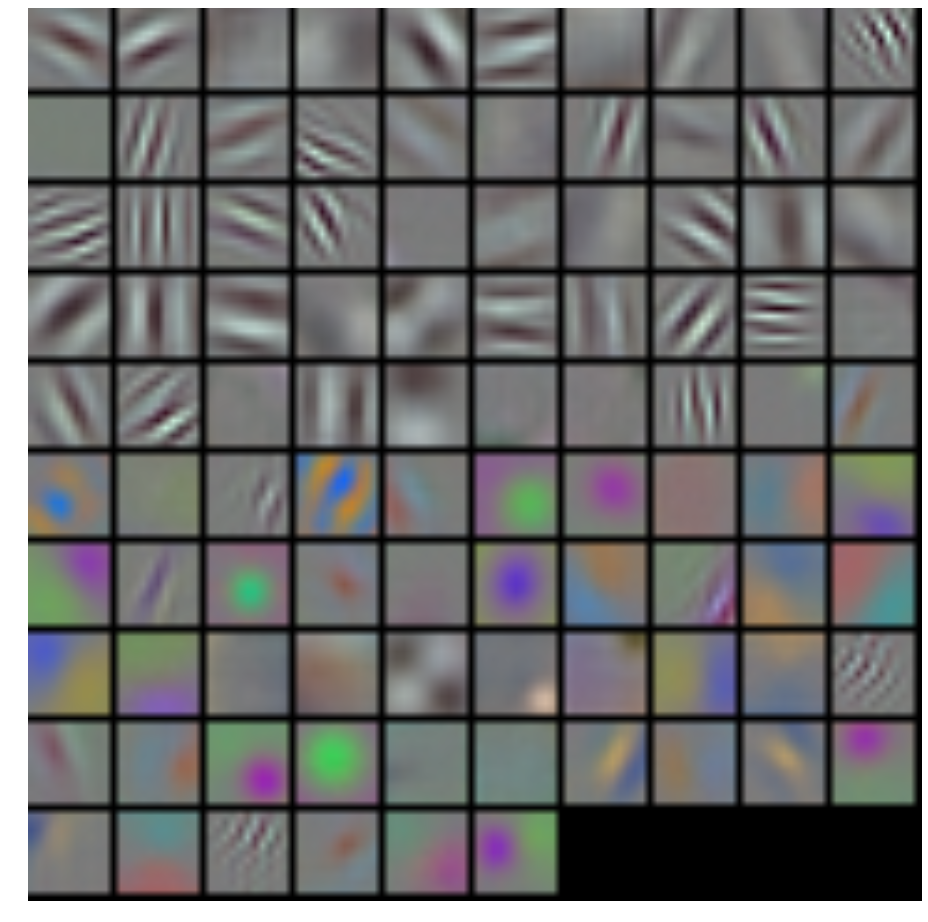

In [38]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
print filters.shape
vis_square(filters[:48].transpose(0, 2, 3, 1), filename = 'conv1.png')

In [39]:
# the parameters are a list of [weights, biases]
print net.params.keys()
print net.params['conv2'][0].data.shape
filters = net.params['conv2'][0].data.reshape(48*256,5,5)
vis_square(filters, filename = 'conv2.png')

['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc-rcnn']
(256, 48, 5, 5)


In [33]:
print net.params['conv3'][0].data.shape
filters = net.params['conv3'][0].data.reshape((384*256/3,3,3,3))
vis_square(filters.transpose(0, 2, 3, 1), filename = 'conv3.png')

(384, 256, 3, 3)
